# Model Evaluation and Selection for Predictive Analytics
In this analysis, we conducted a rigorous evaluation of four machine learning models to identify the most effective approach for our predictive task. The models assessed include two K-Nearest Neighbors (KNN) variants and two Support Vector Machine (SVM) variants, each configured with distinct hyperparameters.

Cross-validation was employed to gauge the performance of each model using the training data, with the goal of estimating their potential effectiveness on unseen data. This method involved segmenting the training set into multiple smaller sets, training each model on these segments, and evaluating their accuracy.

Model Comparison and Selection:

KNN Model 1 and KNN Model 2 were tested with 3 and 5 neighbors respectively. KNN Model 2, with 5 neighbors, showed a higher mean cross-validation accuracy, suggesting better generalizability compared to KNN Model 1.
SVM Model 1 (with a linear kernel) and SVM Model 2 (with an RBF kernel) demonstrated distinct performance traits, with the RBF kernel model outperforming the linear model in terms of cross-validation accuracy.
The model with the highest cross-validation accuracy, KNN Model 2, was selected as the best model. This model was then applied to the testing data, where it achieved an accuracy of approximately 81.79%. The classification report generated for this model on the testing data provided detailed metrics such as precision, recall, and F1-score for each class, offering insights into the model's performance across different aspects of classification.

Key Metrics:

Precision for class 'N' was notably higher, indicating a high accuracy in predicting negative outcomes.
Recall for class 'Y' was lower, suggesting challenges in identifying all positive instances correctly.
This detailed evaluation not only highlights the effectiveness of KNN Model 2 in handling our specific dataset but also underscores the importance of model selection based on robust cross-validation. This process ensures that the chosen model is not only theoretically sound but also practical and reliable in real-world scenarios, where model performance can directly influence decision-making outcomes.


# Data Loading and Inspection:

Loaded the dataset from a GitHub URL using Pandas. Checked basic information about the dataset using info() and displayed summary statistics with describe(). Verified that there are no missing values in the dataset.

Importing Libraries:

pandas: Library for data manipulation and analysis.

numpy: Library for numerical computations in Python.

matplotlib.pyplot: Library for creating data visualizations.

seaborn: Data visualization library based on Matplotlib for making statistical graphics.

sklearn (Scikit-Learn): Library for machine learning in Python.

imblearn.over_sampling.SMOTE: Over-sampling technique for handling imbalanced datasets.

LabelEncoder from sklearn.preprocessing: Used for encoding categorical variables.

Loading Data:
The code loads a dataset from a GitHub URL ("https://raw.githubusercontent.com/Vijayasuriya/M7-DS/main/M7_Data.csv") using the pd.read_csv() function from Pandas.

Displaying Data:
After loading the data, the code displays it by simply running data, which shows the content of the dataset in tabular form.

In [160]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder



# Load the data from the GitHub URL
url = "https://raw.githubusercontent.com/Vijayasuriya/M7-DS/main/M7_Data.csv"
data = pd.read_csv(url)

data

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,Y,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,30,3
14012,Y,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27,27
14013,Y,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,26,3
14014,Y,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,75,15


Display the first few rows of the dataset using the head() function. This allows to get an overview of the dataset by showing the top rows, which typically contain the column names and some sample data points.

In [162]:
# Display the first few rows of the dataset to get an overview
print(data.head())

  TARGET  loyalty   ID  age  city  LOR  prod_A  type_A  type_B  prod_B  \
0      Y       99   77   66     2    0       0       0       0       0   
1      Y        1  159   45     2    3       1       3       3       1   
2      Y        1  220   42     2    2       1       3       6       1   
3      Y       99  303   31     2    0       0       0       0       0   
4      Y       99  306   62     2    0       0       0       0       0   

   turnover_A   turnover_B  contract  age_P  lor_M  
0  333.561114   264.721010         2     66      3  
1  394.735699   284.904978         2     45     39  
2  342.180990  1175.589721         2     42     27  
3  453.757916   242.341754         2     31      3  
4  384.577469   287.008370         2     62      3  


RangeIndex: This tells us that the dataset has a range index, starting from 0 to 14015. This indicates that there are a total of 14,016 rows in the dataset.

Data columns (total n columns): This line indicates that there are 15 columns in the dataset.

Then, for each column in the dataset, you get the following information:

Column: This is the name of the column in the dataset.

Non-Null Count: It shows the number of non-null (non-missing) entries in each column. In this dataset, all columns have 14,016 non-null entries, which means there are no missing values in any of the columns.

Dtype: This specifies the data type of the values in each column. For example, there are two columns with a data type of float64, twelve columns with a data type of int64, and one column with a data type of object (which typically represents strings).

Memory usage: This provides an estimate of the memory used by the dataset. In this case, the dataset consumes approximately 1.6+ MB of memory.

In [163]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB
None


describe() function:

count: This represents the number of non-null values for each numerical feature. It tells us that there are 14,016 non-null values for all features, which means there are no missing values in any of the numerical columns.

mean: This is the average (arithmetic mean) value of each numerical feature. For example, the mean age is approximately 35.88 years, and the mean loyalty score is approximately 50.38.

std: This is the standard deviation, which measures the dispersion or spread of the data. It provides a measure of how much the values in each feature deviate from the mean. A higher standard deviation indicates greater variability. For example, the standard deviation of age is approximately 12.97, indicating some variability in ages.

min: This is the minimum value observed in each feature. For example, the minimum age is 5 years, and the minimum loyalty score is 0.

25%, 50%, and 75%: These are the quartiles of the data distribution. The 25th percentile (1st quartile), 50th percentile (2nd quartile or median), and 75th percentile (3rd quartile) values are provided. These values help understand the data distribution and identify potential outliers. For example, the 25th percentile of age is 25 years, the median age is 33 years, and the 75th percentile of age is 43 years.

max: This is the maximum value observed in each feature. For example, the maximum age is 102 years, and the maximum loyalty score is 99.

Overall, the describe() function provides a summary of key statistical measures for each numerical feature, helping you understand the central tendency, spread, and range of values in the dataset. It's useful for initial data exploration and identifying any potential issues or outliers in the data.

In [164]:
# Summary statistics of numerical features
print(data.describe())

            loyalty             ID           age           city           LOR  \
count  14016.000000   14016.000000  14016.000000   14016.000000  14016.000000   
mean      50.381778   37672.440068     35.882920    -710.950128      0.926299   
std       48.471790   44855.639209     12.974634   26702.329184      0.965212   
min        0.000000       1.000000      5.000000 -999999.000000      0.000000   
25%        2.000000    6741.500000     25.000000       2.000000      0.000000   
50%        3.000000   13514.500000     33.000000       2.000000      1.000000   
75%       99.000000   62738.000000     43.000000       2.000000      1.000000   
max       99.000000  151811.000000    102.000000     235.000000      6.000000   

             prod_A        type_A        type_B        prod_B    turnover_A  \
count  14016.000000  14016.000000  14016.000000  14016.000000  14016.000000   
mean       0.533818      1.607877      1.918878      0.599458    379.161320   
std        0.498873      1.508991

This code checks for missing values in the dataset using the isnull().sum() method. The output indicates that there are no missing values (null values) in any of the columns of the dataset. 


Here's an explanation of the output:
Each column name is listed in the output, and the corresponding value represents the number of missing values in that column. In this case, all columns have a value of 0, which means there are no missing values.
This is a desirable outcome because missing values can potentially impact the quality of your analysis and machine learning models. In this dataset, we don't have to worry about missing data, which is a good starting point for data analysis and modeling.

In [165]:
# Check for missing values
print(data.isnull().sum())

TARGET        0
loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64


The line of code duplicate_rows = data[data.duplicated()] creates a new DataFrame named duplicate_rows by selecting rows in the data DataFrame that are duplicates. It checks for duplicates across all columns and retains only the duplicated rows.

The subsequent line, print("Duplicate Rows:"), serves as a header indicating that the upcoming output will display duplicate rows.

Following that, print(duplicate_rows) is responsible for printing the duplicate_rows DataFrame, which contains all the records that are duplicated in the original dataset.

In this particular dataset, it appears that there are 3,008 duplicate rows. These rows share identical values across all columns, and they have been identified and presented in the output. Duplicate records can sometimes impact the accuracy of analysis or machine learning models, so it's important to make a decision regarding whether to keep or remove them based on the specific context of the analysis.

In [166]:
# Find and display duplicate records
duplicate_rows = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
      TARGET  loyalty      ID  age  city  LOR  prod_A  type_A  type_B  prod_B  \
11008      Y       99      77   66     2    0       0       0       0       0   
11009      Y        1     159   45     2    3       1       3       3       1   
11010      Y        1     220   42     2    2       1       3       6       1   
11011      Y       99     303   31     2    0       0       0       0       0   
11012      Y       99     306   62     2    0       0       0       0       0   
...      ...      ...     ...  ...   ...  ...     ...     ...     ...     ...   
14011      Y       99  151601   30     2    0       0       0       0       0   
14012      Y        1  151634   27     2    2       1       3       3       1   
14013      Y       99  151679   26     2    0       0       0       0       0   
14014      Y        1  151804   75     2    1       1       3       3       1   
14015      Y       99  151811   61     2    0       0       0       0       0   

       turn

data = data.drop_duplicates(): In this line of code, duplicates are removed from the data DataFrame, and the resulting cleaned DataFrame is assigned back to the data variable. The drop_duplicates() function identifies and removes rows that have identical values in all columns, retaining only the first occurrence of each unique row.

After executing this code, you'll observe that the dataset has been updated, and it now consists of 11,008 rows, as opposed to the original 14,016 rows.

The removal of duplicate rows ensures that the dataset contains only unique records. This is a crucial step in maintaining data quality and integrity, especially when preparing the data for subsequent analysis or the development of machine learning models.

In [167]:
# Eliminate duplicate records
data = data.drop_duplicates()
data

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,N,1,16793,33,2,2,1,3,3,1,302.380331,229.457986,2,33,27
11004,N,99,16794,23,2,0,0,0,0,0,316.268616,228.518505,2,23,3
11005,N,1,16798,23,2,2,1,3,3,1,385.871241,236.665515,2,23,27
11006,N,99,16800,32,2,1,1,3,3,1,317.578868,226.899614,2,32,15


# Data Visualization:
Visualized the distribution of the target variable ('TARGET') using a countplot. Plotted histograms and distributions for selected numerical features. Visualized the distribution of categorical features using countplots. Plotted a correlation matrix heatmap to explore relationships between numerical features. Created a pairplot to visualize relationships between numerical features.

This code generates a bar plot to visualize the distribution of the target variable in the dataset.

plt.figure(figsize=(6, 4)): This line of code sets the figure size for the plot. It specifies the width and height of the figure in inches. In this case, the figure will have a width of 6 inches and a height of 4 inches.

sns.countplot(x="TARGET", data=data): This line of code creates a countplot using the Seaborn library. It counts the occurrences of each unique value in the "TARGET" column of your DataFrame (data) and displays them as bars. The x parameter specifies the column to be plotted, which is "TARGET" in this case.

plt.title("Distribution of Target Variable"): This line sets the title of the plot to "Distribution of Target Variable."

plt.xlabel("TARGET"): This line labels the x-axis of the plot with the text "TARGET."

plt.ylabel("Count"): This line labels the y-axis of the plot with the text "Count."

plt.show(): This line displays the plot on the screen.

The resulting plot is a bar chart that shows the distribution of the "TARGET" variable. It displays the counts of each unique value ("Y" and "N") on the x-axis, and the corresponding counts on the y-axis. This visualization helps us understand the balance or class distribution of the target variable, which can be important for classification tasks and model evaluation.

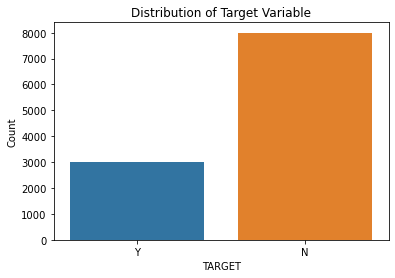

In [168]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x="TARGET", data=data)
plt.title("Distribution of Target Variable")
plt.xlabel("TARGET")
plt.ylabel("Count")
plt.show()

This code generates subplots to visualize the distribution of numerical features in the dataset.

num_features: This is a list containing the names of numerical features that you want to visualize. These features include "age," "age_P," "LOR," "lor_M," "turnover_A," and "turnover_B."

plt.figure(figsize=(12, 8)): This line of code sets the figure size for the entire plot. It specifies the width and height of the figure in inches, making it 12 inches wide and 8 inches tall.

The following for loop iterates through the numerical features in num_features:

a. for i, feature in enumerate(num_features, 1): This loop iterates over each feature in the num_features list, and enumerate is used to keep track of the index i (starting from 1) and the feature name feature.

b. plt.subplot(2, 3, i): This line specifies the subplot layout. It creates a grid of 2 rows and 3 columns of subplots, and i determines the position of the current subplot within this grid. The subplots will be organized in a 2x3 grid.

c. sns.histplot(data[feature], kde=True): This line creates a histogram plot using Seaborn for the current numerical feature (data[feature]). The kde=True argument adds a Kernel Density Estimation (KDE) plot on top of the histogram to visualize the probability density.

d. plt.title(f"Distribution of {feature}"): This line sets the title of the subplot to indicate which feature's distribution is being displayed.

e. plt.xlabel(feature): This line labels the x-axis of the subplot with the name of the feature.

plt.tight_layout(): This line ensures that the subplots are properly arranged and spaced within the figure.

plt.show(): This line displays the entire plot, which consists of multiple subplots, each showing the distribution of one of the numerical features.

The resulting plot is a grid of histograms and KDE plots, where each subplot represents the distribution of one numerical feature. This visualization provides insights into the distribution, central tendency, and spread of each numerical feature in the dataset, helping us understand the data's characteristics.

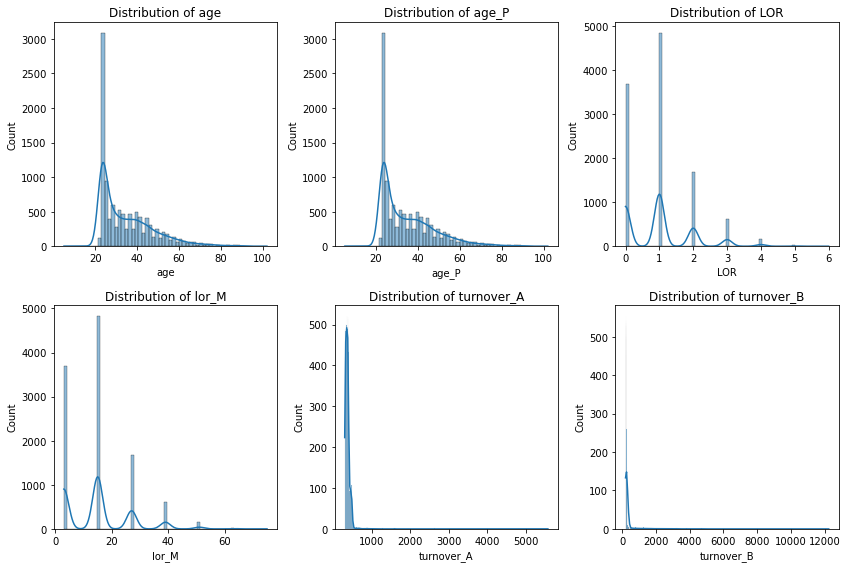

In [169]:
# Visualize the distribution of numerical features
num_features = ["age", "age_P", "LOR", "lor_M", "turnover_A", "turnover_B"]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

The below code generates subplots to visualize the distribution of categorical features in the dataset.

cat_features: This is a list containing the names of categorical features that you want to visualize. These features include "loyalty," "city," "type_A," "type_B," and "contract."

plt.figure(figsize=(12, 8)): This line of code sets the figure size for the entire plot. It specifies the width and height of the figure in inches, making it 12 inches wide and 8 inches tall.

The following for loop iterates through the categorical features in cat_features:

a. for i, feature in enumerate(cat_features, 1): This loop iterates over each feature in the cat_features list, and enumerate is used to keep track of the index i (starting from 1) and the feature name feature.

b. plt.subplot(2, 3, i): This line specifies the subplot layout. It creates a grid of 2 rows and 3 columns of subplots, and i determines the position of the current subplot within this grid. The subplots will be organized in a 2x3 grid.

c. sns.countplot(x=feature, data=data): This line creates a countplot using Seaborn for the current categorical feature (feature). A countplot shows the frequency of each category within the feature.

d. plt.title(f"Distribution of {feature}"): This line sets the title of the subplot to indicate which feature's distribution is being displayed.

e. plt.xlabel(feature): This line labels the x-axis of the subplot with the name of the feature.

f. plt.xticks(rotation=45): This line rotates the x-axis labels by 45 degrees to make them more readable if they are long or overlapping.

plt.tight_layout(): This line ensures that the subplots are properly arranged and spaced within the figure.

plt.show(): This line displays the entire plot, which consists of multiple subplots, each showing the distribution of one categorical feature.

The resulting plot is a grid of countplots, where each subplot represents the distribution of one categorical feature. This visualization provides insights into the frequency and distribution of categories within each categorical feature in the dataset, helping us understand the composition of these features.

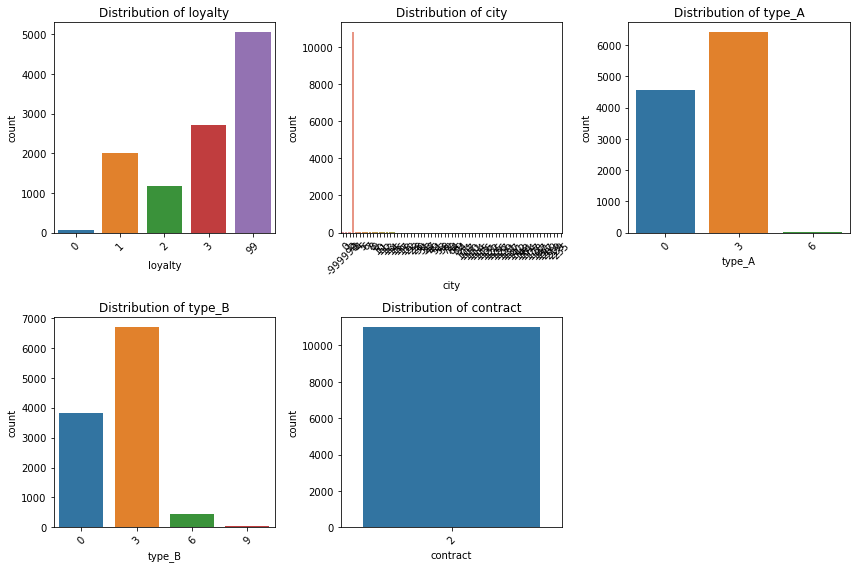

In [170]:
# Visualize the distribution of categorical features
cat_features = ["loyalty", "city", "type_A", "type_B", "contract"]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, data=data)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The below code generates a heatmap to visualize the correlation matrix of numerical features in the dataset.

correlation_matrix: This line calculates the correlation matrix of numerical features in your dataset. You have previously defined the num_features list, which contains the names of numerical features you want to include in the correlation analysis. The corr() function computes the pairwise correlations between these numerical features.

plt.figure(figsize=(8, 6)): This line sets the figure size for the heatmap. It specifies the width and height of the figure in inches, making it 8 inches wide and 6 inches tall.

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5): This line creates the heatmap using Seaborn. Here's what each parameter does:

correlation_matrix: This is the data to be visualized, which is the correlation matrix you calculated earlier.
annot=True: This parameter specifies that the cell values (correlation coefficients) should be annotated on the heatmap.
cmap="coolwarm": This parameter sets the color map for the heatmap. "coolwarm" is a predefined color map that ranges from cool colors (e.g., blue) for negative correlations to warm colors (e.g., red) for positive correlations.
fmt=".2f": This parameter specifies the format for annotating the cell values. ".2f" indicates that the values should be displayed with two decimal places.
linewidths=0.5: This parameter sets the width of the lines separating the cells in the heatmap.
plt.title("Correlation Matrix"): This line sets the title of the heatmap to "Correlation Matrix."

plt.show(): This line displays the heatmap, which visualizes the pairwise correlations between the numerical features in the dataset. 

In the heatmap:
Darker colors (closer to red) represent strong positive correlations.
Darker colors (closer to blue) represent strong negative correlations.
Lighter colors represent weaker or no correlations.
The resulting heatmap provides insights into the relationships between numerical features. We use it to identify features that are strongly correlated (positively or negatively) with each other, which can be useful for feature selection and understanding the data's patterns and dependencies.

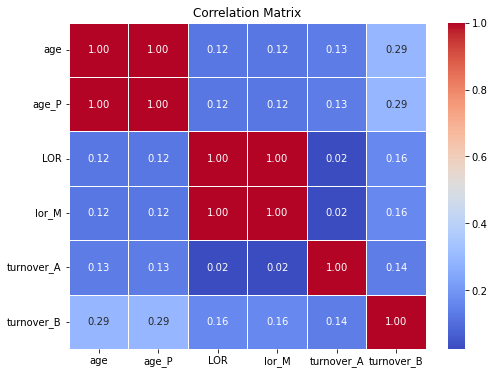

In [171]:
# Visualize the correlation matrix of numerical features
correlation_matrix = data[num_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

The below code generates a pairplot to visualize the relationships between numerical features in our dataset.

sns.pairplot(data[num_features], diag_kind="kde"): This line creates a pairplot using Seaborn. 


Here's what each parameter does:

data[num_features]: This specifies the data to be used for creating the pairplot, which includes only the numerical features defined in the num_features list.

diag_kind="kde": This parameter specifies the type of plot to be shown on the diagonal of the pairplot grid. In this case, "kde" stands for kernel density estimate, and it displays the estimated probability density function of each numerical feature on the diagonal.

plt.suptitle("Pairplot of Numerical Features", y=1.02): This line sets the super title (title above the entire plot) of the pairplot. It positions the title slightly higher (y=1.02) to avoid overlapping with the plot.

plt.show(): This line displays the pairplot, which consists of scatterplots of numerical features against each other and kernel density estimates (KDE) of the distribution of each numerical feature along the diagonal.

The resulting pairplot is a grid of scatterplots that visualizes how pairs of numerical features are related to each other. Each scatterplot in the lower triangle of the grid shows the relationship between two numerical features, with points indicating data points' positions in the feature space. The diagonal of the grid contains KDE plots, showing the distribution of each numerical feature.

By examining the pairplot, we can gain insights into the relationships, patterns, and distributions of numerical features. For example:

Scatterplots can help us identify linear or nonlinear relationships between pairs of features.
KDE plots provide information about the distribution and shape of each individual feature.
This visualization can be valuable for understanding the data's structure and identifying potential patterns or correlations between numerical variables.

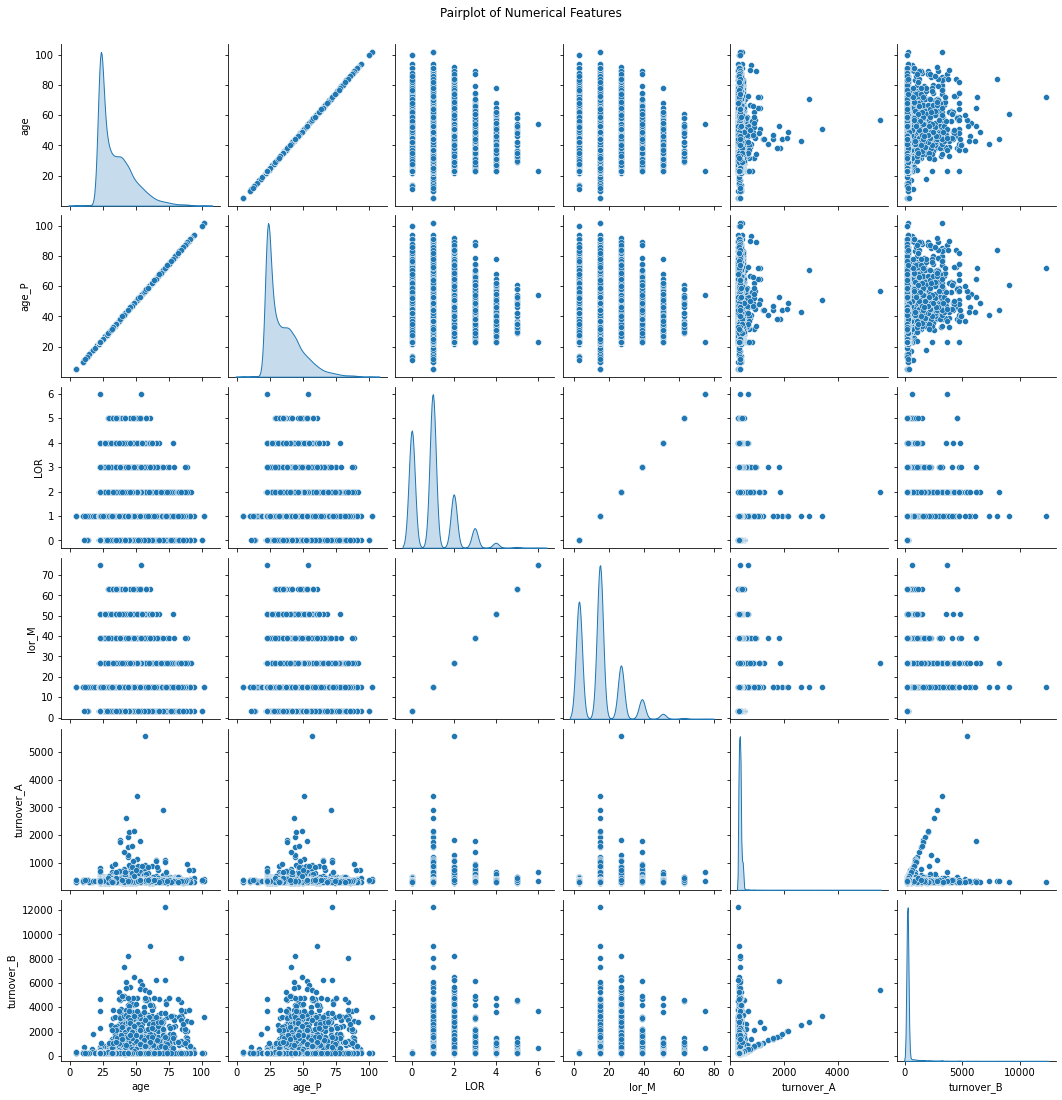

In [172]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(data[num_features], diag_kind="kde")
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

The below code generates a boxplot to visualize the relationship between the "age" variable and the "TARGET" variable (which seems to represent the purchase of additional insurance).

plt.figure(figsize=(10, 6)): This line sets the figure size for the plot, specifying a width of 10 units and a height of 6 units. This is done to control the size of the resulting boxplot.

sns.boxplot(x="TARGET", y="age", data=data): This line creates the boxplot using Seaborn's boxplot function. 

Here's what each parameter does:

x="TARGET": This parameter specifies the variable to be displayed on the x-axis of the boxplot, which is the "TARGET" variable. In this context, it's typically a categorical variable indicating the purchase of additional insurance (e.g., "Y" for Yes and "N" for No).

y="age": This parameter specifies the variable to be displayed on the y-axis of the boxplot, which is the "age" variable. It represents the age of individuals in the dataset.

data=data: This parameter specifies the dataset to be used for creating the boxplot, which is the data DataFrame.

plt.title("Age vs. Target (Purchase of Additional Insurance)"): This line sets the title of the boxplot, providing information about the variables being compared.

plt.xlabel("TARGET") and plt.ylabel("Age"): These lines set the labels for the x-axis and y-axis, respectively, to provide context for the plot.

plt.show(): This line displays the boxplot.

The resulting boxplot provides insights into the distribution of ages for different categories of the "TARGET" variable (e.g., purchase of additional insurance). Boxplots are useful for identifying potential outliers, central tendencies, and the spread of data within each category.

In this specific plot:

The box represents the interquartile range (IQR) of the age distribution for each category of "TARGET."
The line inside the box represents the median age.
The whiskers extend to the minimum and maximum ages within 1.5 times the IQR from the lower and upper quartiles, respectively.
Any individual data points outside the whiskers are considered potential outliers and are plotted individually as points.
By examining the boxplot, you can identify if there are significant differences in age distributions between the two categories of the "TARGET" variable and whether there are any potential outliers in the "age" variable within each category.

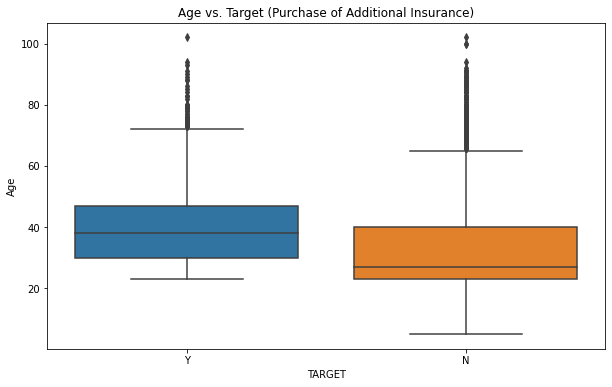

In [173]:
# Boxplot to identify potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x="TARGET", y="age", data=data)
plt.title("Age vs. Target (Purchase of Additional Insurance)")
plt.xlabel("TARGET")
plt.ylabel("Age")
plt.show()

# Data Engineering:
Performed data engineering tasks, including binning the 'age' feature into age groups, creating a 'Turnover_Ratio' feature, and applying Min-Max scaling to specific columns. Visualized the distribution of age groups and the turnover ratio.

The below code is performing the binning of the 'age' feature into different age groups using the Pandas cut function.

bins = [0, 18, 30, 50, np.inf]: This line defines the bin edges or boundaries for the age groups. It creates a list called bins with the following elements:

[0, 18]: Represents the age group for individuals aged 0 to 18 (inclusive).
(18, 30]: Represents the age group for individuals aged 19 to 30 (inclusive).
(30, 50]: Represents the age group for individuals aged 31 to 50 (inclusive).
(50, np.inf]: Represents the age group for individuals aged 51 and above. np.inf is used to represent positive infinity, so this bin includes all ages above 50.
labels = ['0-18', '19-30', '31-50', '51+']: This line defines the labels that will be assigned to each age group. It creates a list called labels with the corresponding age group labels:

'0-18': Label for the age group 0-18.
'19-30': Label for the age group 19-30.
'31-50': Label for the age group 31-50.
'51+': Label for the age group 51 and above.
data['Age_Group'] = pd.cut(data['age'], bins=bins, labels=labels): This line applies the binning to the 'age' column in the DataFrame data using the pd.cut function. Here's what each parameter does:

data['age']: Specifies the column of data that will be binned, which is the 'age' column in this case.
bins=bins: Specifies the bin edges defined earlier.
labels=labels: Specifies the labels to be assigned to each bin.
The result is a new column called 'Age_Group' in the data DataFrame, which contains the age group labels corresponding to each individual's age.

data['Age_Group']: This line displays the content of the 'Age_Group' column after the binning operation.

The purpose of binning the 'age' feature into age groups is to transform a continuous numerical variable (age) into a categorical one (age groups) for analysis. This can be useful for various purposes, such as creating age-related segments or visualizing age distributions in a more interpretable way. The resulting 'Age_Group' column will contain values like '0-18', '19-30', '31-50', or '51+', indicating the age group to which each individual belongs based on their age.

In [174]:
#Binning the 'age' feature into age groups
bins = [0, 18, 30, 50, np.inf]
labels = ['0-18', '19-30', '31-50', '51+']
data['Age_Group'] = pd.cut(data['age'], bins=bins, labels=labels)
data['Age_Group']

C:\Users\vijay\AppData\Local\Temp\ipykernel_3828\2799606965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_Group'] = pd.cut(data['age'], bins=bins, labels=labels)


0          51+
1        31-50
2        31-50
3        31-50
4          51+
         ...  
11003    31-50
11004    19-30
11005    19-30
11006    31-50
11007    19-30
Name: Age_Group, Length: 11008, dtype: category
Categories (4, object): ['0-18' < '19-30' < '31-50' < '51+']

The below code, we are creating a new feature called 'Turnover_Ratio' based on the existing columns 'turnover_A' and 'turnover_B' in your DataFrame.

data['Turnover_Ratio'] = data['turnover_A'] / (data['turnover_A'] + data['turnover_B']): This line of code calculates the 'Turnover_Ratio' for each row in your DataFrame and assigns the result to a new column named 'Turnover_Ratio'.

data['turnover_A']: This part retrieves the values from the 'turnover_A' column for all rows.
data['turnover_B']: This part retrieves the values from the 'turnover_B' column for all rows.
The expression data['turnover_A'] + data['turnover_B'] calculates the sum of 'turnover_A' and 'turnover_B' for each row in the DataFrame.

Finally, data['turnover_A'] / (data['turnover_A'] + data['turnover_B']) computes the ratio of 'turnover_A' to the sum of 'turnover_A' and 'turnover_B' for each row, and these ratios are stored in the 'Turnover_Ratio' column.

data['Turnover_Ratio']: This line of code displays the content of the newly created 'Turnover_Ratio' column, showing the turnover ratios for each row in the DataFrame.

The 'Turnover_Ratio' feature represents the proportion of 'turnover_A' out of the total turnover, which includes both 'turnover_A' and 'turnover_B'. It can be used for various analytical purposes, such as understanding the contribution of 'turnover_A' to the overall turnover or for exploring relationships between turnover ratios and other variables in our dataset.

In [175]:
# Example: Creating a turnover ratio feature
data['Turnover_Ratio'] = data['turnover_A'] / (data['turnover_A'] + data['turnover_B'])
data['Turnover_Ratio']

C:\Users\vijay\AppData\Local\Temp\ipykernel_3828\3466201583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Turnover_Ratio'] = data['turnover_A'] / (data['turnover_A'] + data['turnover_B'])


0        0.557531
1        0.580801
2        0.225450
3        0.651858
4        0.572641
           ...   
11003    0.568557
11004    0.580536
11005    0.619837
11006    0.583272
11007    0.629282
Name: Turnover_Ratio, Length: 11008, dtype: float64

In the below code, we are attempting to perform one-hot encoding on the 'Contract' column in your DataFrame. However, it appears that the 'Contract' column does not exist in your DataFrame, which is why you are getting the message "The 'Contract' column does not exist in your DataFrame."

Explanation of what happened below:

if 'Contract' in data.columns:: This line checks whether the column named 'Contract' exists in your DataFrame by examining the column names stored in data.columns.

data = pd.get_dummies(data, columns=['Contract'], prefix='contract'): If the 'Contract' column exists, this line would perform one-hot encoding on that column. It would create dummy variables for the unique values in the 'Contract' column and add them to the DataFrame. The prefix='contract' argument specifies a prefix to be added to the newly created dummy columns.

else:: If the 'Contract' column does not exist, this part of the code is executed.

print("The 'Contract' column does not exist in your DataFrame."): This line simply prints a message indicating that the 'Contract' column is not present in our DataFrame.

In [176]:
# One-hot encoding the 'Contract' column
if 'Contract' in data.columns:
    data = pd.get_dummies(data, columns=['Contract'], prefix='contract')
else:
    print("The 'Contract' column does not exist in your DataFrame.")

The 'Contract' column does not exist in your DataFrame.


In the below code, we have applied Min-Max scaling to three specific columns: 'age', 'turnover_A', and 'turnover_B'. Min-Max scaling is a data preprocessing technique that scales numerical features to a specific range, typically between 0 and 1, preserving the relationships between the values.

In the code,

We import the MinMaxScaler from the sklearn.preprocessing module.

We create an instance of the MinMaxScaler called scaler.

We use scaler.fit_transform() to perform Min-Max scaling on the selected columns: 'age', 'turnover_A', and 'turnover_B'. This method scales the values in these columns individually to the range [0, 1].

Finally, you display the scaled columns using data[['age', 'turnover_A', 'turnover_B']].

The result is that the 'age', 'turnover_A', and 'turnover_B' columns have been scaled, and their values are now in the range [0, 1], which can be useful for certain machine learning algorithms that are sensitive to the scale of input features. The scaled values maintain the same relationships as the original values, but they are now within the specified range.

In [177]:
#Min-Max scaling for selected columns
scaler = MinMaxScaler()
data[['age', 'turnover_A', 'turnover_B']] = scaler.fit_transform(data[['age', 'turnover_A', 'turnover_B']])
data[['age', 'turnover_A', 'turnover_B']]

C:\Users\vijay\AppData\Local\Temp\ipykernel_3828\120885128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['age', 'turnover_A', 'turnover_B']] = scaler.fit_transform(data[['age', 'turnover_A', 'turnover_B']])


,age,turnover_A,turnover_B
0,0.628866,0.006352,0.006034
1,0.412371,0.017963,0.007708
2,0.381443,0.007988,0.081581
3,0.268041,0.029165,0.004178
4,0.587629,0.016035,0.007883
...,...,...,...
11003,0.288660,0.000434,0.003110
11004,0.185567,0.003070,0.003032
11005,0.185567,0.016280,0.003708
11006,0.278351,0.003318,0.002898


In the below code, we are performing several steps for a classification task using a RandomForestClassifier and addressing class imbalance using the Synthetic Minority Over-sampling Technique (SMOTE).

Label Encoding for 'Age_Group':
We create a label encoder called label_encoder.

We convert the 'Age_Group' column to a categorical data type using .astype('category') and then use .cat.codes to encode the categories numerically.

One-Hot Encoding for Categorical Columns:
We identify and store the names of categorical columns in the categorical_columns variable.

We use pd.get_dummies() to perform one-hot encoding on these categorical columns. This converts categorical variables into binary columns (0 or 1) for each category.

Splitting Data:
We split the dataset into features (X) and the target variable (y).
X contains all columns except the 'TARGET' column, which is your feature set.
y contains only the 'TARGET' column, which is your target variable.

Train-Test Split:
We further split your data into training and testing sets using train_test_split(). This is a common practice in machine learning to evaluate model performance.
The training set, X_train and y_train, is used to train the model.
The testing set, X_test and y_test, is used to evaluate the model's performance on unseen data.

SMOTE for Balancing Classes:
We create an instance of the SMOTE class called smote to handle class imbalance.
We use smote.fit_resample() to oversample the minority class in the training set, making the class distribution more balanced.

Model Training:
We create a RandomForestClassifier called clf with a specified random seed.
We train the model using the resampled training data (X_train_resampled and y_train_resampled) to learn the patterns in the data.

Making Predictions:
We use the trained model to make predictions on the test set (X_test).

Model Evaluation:
We print a classification report using classification_report() to evaluate the model's performance on the test set.

The classification report provides precision, recall, F1-score, and support for each class ('N' and 'Y'), as well as macro and weighted averages.

The classification report shows various metrics that help assess the model's performance in terms of precision (accuracy of positive predictions), recall (true positive rate), F1-score (harmonic mean of precision and recall), and support (number of samples). In this case, it appears that the model is performing well with high precision, recall, and F1-score for both classes ('N' and 'Y').

In [178]:
# Create a label encoder
label_encoder = LabelEncoder()

data['Age_Group'] = data['Age_Group'].astype('category').cat.codes



categorical_columns = data.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(data, columns=categorical_columns)

# Split the dataset into features (X) and the target variable (y)
X = data.drop('TARGET', axis=1)  # Replace 'target_column' with the actual name of your target column
y = data['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train a machine learning model (e.g., RandomForest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\Users\vijay\AppData\Local\Temp\ipykernel_3828\4016099221.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_Group'] = data['Age_Group'].astype('category').cat.codes


Classification Report:
              precision    recall  f1-score   support

           N       0.99      1.00      0.99      1601
           Y       1.00      0.97      0.98       601

    accuracy                           0.99      2202
   macro avg       0.99      0.99      0.99      2202
weighted avg       0.99      0.99      0.99      2202



# Handling Outliers:
Defined a function to handle outliers based on z-scores but didn't apply it to the data

Function Definition: We define a function called handle_outliers that takes three arguments: data, TARGET, and an optional threshold with a default value of 2.

Z-Scores Calculation: Inside the function, we calculate the z-scores for the 'TARGET' column using the formula (data['TARGET'] - data['TARGET'].mean()) / data['TARGET'].std(). This calculates how many standard deviations each data point is away from the mean.

Outlier Removal: We attempt to filter the rows in the data DataFrame based on the absolute z-scores being less than the threshold value. If the absolute z-score is less than the threshold, the row is retained in the DataFrame; otherwise, it is removed.

Return Filtered Data: Finally, we return the filtered DataFrame.

In [179]:
def handle_outliers(data, column_name, threshold=2):
    # Calculate z-scores for the specified column
    z_scores = (data[column_name] - data[column_name].mean()) / data[column_name].std()
    
    # Keep rows where absolute z-scores are less than the threshold
    data = data[np.abs(z_scores) < threshold]
    
    return data

# Specify the column name for which you want to handle outliers
column_to_handle = 'age'

# Call the function to handle outliers for the specified column
data = handle_outliers(data, column_to_handle)

# Display the filtered data
print(data)

      TARGET  loyalty     ID       age  city  LOR  prod_A  type_A  type_B  \
1          Y        1    159  0.412371     2    3       1       3       3   
2          Y        1    220  0.381443     2    2       1       3       6   
3          Y       99    303  0.268041     2    0       0       0       0   
5          Y        3    340  0.195876     2    1       1       3       3   
6          Y       99    353  0.536082     2    0       0       0       0   
...      ...      ...    ...       ...   ...  ...     ...     ...     ...   
11003      N        1  16793  0.288660     2    2       1       3       3   
11004      N       99  16794  0.185567     2    0       0       0       0   
11005      N        1  16798  0.185567     2    2       1       3       3   
11006      N       99  16800  0.278351     2    1       1       3       3   
11007      N        2  16801  0.185567     2    3       1       3       3   

       prod_B  turnover_A  turnover_B  contract  age_P  lor_M  Age_Group  \

Splitting the Data:

The dataset (data) that contains both the features (independent variables) and the target variable (dependent variable).
We split this dataset into two parts: one for training the machine learning model and another for testing the model's performance.

Defining Features and Target:

We define two variables:
x: This variable contains all the columns from your dataset except for the 'TARGET' column. These columns are considered as features that the machine learning model will use to make predictions.

y: This variable contains only the 'TARGET' column from your dataset. This is the target variable that you want to predict based on the features.

Using train_test_split:
You utilize the train_test_split function from scikit-learn, which is a widely used library for machine learning in Python.
train_test_split takes your feature matrix (X) and target variable (y) as input and splits them into four sets:
X_train: This set contains a portion of the features for training the model.
X_test: This set contains the remaining portion of the features for testing the model.
y_train: This set contains the corresponding target values for training.
y_test: This set contains the corresponding target values for testing.

The test_size parameter is set to 0.2, which means that 20% of the data will be used for testing, and the remaining 80% will be used for training.

The random_state parameter is set to 42 to ensure that the split is reproducible. Using the same value for random_state allows you to obtain the same split every time you run the code.

Displaying the Sets:
After splitting, we could see the contents of the training and testing sets by printing X_train, X_test, y_train, and y_test. These sets are essential for training and evaluating machine learning models, ensuring that the model can be generalized well to unseen data.

In [180]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['TARGET'])
y = data['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train 
X_test 
y_train
y_test

7922    N
7794    N
2626    Y
1500    Y
2279    Y
       ..
3112    N
7245    N
6988    N
7547    N
6022    N
Name: TARGET, Length: 2092, dtype: object

In the below code, we are displaying the first few rows of your DataFrame data using the head() function.

Each row in the output represents an individual data point or observation.
The columns are labeled at the top, and each column represents a specific attribute or feature of the dataset.

Here's a breakdown of the columns and their meanings:

TARGET: This column contains binary values 'Y' or 'N' and likely represents the target variable or the outcome you want to predict in a machine learning task. 'Y' may indicate a positive outcome, while 'N' may indicate a negative outcome.

loyalty: This column appears to represent a loyalty score or category. It contains numerical values.

ID: This column likely represents a unique identifier for each data point. It contains numerical values.

age: This column appears to represent the age of individuals. It contains numerical values scaled between 0 and 1, possibly after feature scaling.

city: This column likely represents a categorical variable denoting the city. It contains numerical codes.

LOR: This column represents a numerical attribute, possibly related to the length of relationship (LOR).

prod_A, type_A, type_B, prod_B: These columns seem to represent categorical variables with numerical codes or categories.

turnover_A and turnover_B: These columns contain numerical values that may represent some form of turnover.

contract: This column represents a categorical variable, possibly related to contract types.

age_P and lor_M: These columns contain numerical values, but their meanings are not clear from the column names.

Age_Group: This column appears to represent age groups and is encoded as numerical values.

Turnover_Ratio: This column contains numerical values, possibly a calculated ratio based on turnover.

In [181]:
print(data.head())  # Display the first few rows of the DataFrame

  TARGET  loyalty   ID       age  city  LOR  prod_A  type_A  type_B  prod_B  \
1      Y        1  159  0.412371     2    3       1       3       3       1   
2      Y        1  220  0.381443     2    2       1       3       6       1   
3      Y       99  303  0.268041     2    0       0       0       0       0   
5      Y        3  340  0.195876     2    1       1       3       3       1   
6      Y       99  353  0.536082     2    0       0       0       0       0   

   turnover_A  turnover_B  contract  age_P  lor_M  Age_Group  Turnover_Ratio  
1    0.017963    0.007708         2     45     39          2        0.580801  
2    0.007988    0.081581         2     42     27          2        0.225450  
3    0.029165    0.004178         2     31      3          2        0.651858  
5    0.030434    0.004603         2     24     15          1        0.650425  
6    0.036891    0.001992         2     57      3          3        0.695997  


The data.dtypes output displays the data types of each column in your DataFrame.

TARGET: This column has the data type "object," which typically represents categorical or string data. In this case, it contains values 'Y' and 'N,' indicating binary categorical data.

loyalty: This column has the data type "int64," which indicates integer values. It likely represents a numerical feature, possibly related to loyalty scores.

ID: This column also has the data type "int64," indicating integer values. It likely represents unique identifiers for each data point.

age: This column has the data type "float64," indicating floating-point numerical values. It represents the age of individuals, and the values appear to be scaled between 0 and 1, possibly after feature scaling.

city: This column is of data type "int64," representing integer values. It likely encodes categorical information related to the city.

LOR: Similar to city, this column is of data type "int64" and likely represents a numerical attribute related to the length of a relationship (LOR).

prod_A, type_A, type_B, prod_B: These columns have data type "int64," indicating integer values. They likely represent categorical variables encoded as integers.

turnover_A and turnover_B: These columns have the data type "float64," indicating floating-point numerical values. They appear to represent numerical attributes, possibly related to turnover.

contract: This column is of data type "int64" and represents a categorical variable related to contract types.

age_P and lor_M: Both columns are of data type "int64" and contain integer values. Their meanings are not entirely clear from the column names.

Age_Group: This column is of data type "int8," indicating integer values stored with less memory consumption. It represents age groups and has likely been encoded numerically.

Turnover_Ratio: This column has the data type "float64," indicating floating-point numerical values. It appears to represent a calculated ratio based on turnover.

Understanding the data types of columns is crucial for data analysis and modeling tasks, as it helps determine how the data can be used and whether any further data type conversions or preprocessing steps are required.

In [182]:
print(data.dtypes)

TARGET             object
loyalty             int64
ID                  int64
age               float64
city                int64
LOR                 int64
prod_A              int64
type_A              int64
type_B              int64
prod_B              int64
turnover_A        float64
turnover_B        float64
contract            int64
age_P               int64
lor_M               int64
Age_Group            int8
Turnover_Ratio    float64
dtype: object


The data.describe() output provides statistical summary information for the numerical columns in the DataFrame.

count: This row shows the count of non-missing values for each numerical column. It indicates that there are 9,934 non-missing values in each column.

mean: This row displays the mean (average) value for each column. For example, the mean value for the 'loyalty' column is approximately 47.12.

std: This row represents the standard deviation, which measures the spread or dispersion of values around the mean. It gives an indication of how much the values in the column deviate from the mean. For instance, the standard deviation for the 'loyalty' column is approximately 48.32.

min: The 'min' row indicates the minimum value observed in each column. For example, the minimum value for the 'loyalty' column is 0.

25%, 50%, 75%: These rows represent the quartiles of the data. The 25th percentile (Q1) is the value below which 25% of the data falls, the 50th percentile (Q2 or median) is the value below which 50% of the data falls, and the 75th percentile (Q3) is the value below which 75% of the data falls. These values provide insights into the data's distribution.

max: The 'max' row displays the maximum value observed in each column. For example, the maximum value for the 'loyalty' column is 99.

These statistics are useful for understanding the central tendency, spread, and distribution of numerical features in your dataset. They can help identify potential outliers, assess data variability, and gain insights into the overall characteristics of the data.

In [183]:
print(data.describe())

            loyalty             ID           age           city           LOR  \
count  10460.000000   10460.000000  10460.000000   10460.000000  10460.000000   
mean      47.029828   26811.574187      0.288912    -762.277725      0.977820   
std       48.328762   38391.018226      0.105942   27646.137199      0.938029   
min        0.000000       1.000000      0.051546 -999999.000000      0.000000   
25%        2.000000    5450.750000      0.195876       2.000000      0.000000   
50%        3.000000   10989.500000      0.257732       2.000000      1.000000   
75%       99.000000   16589.500000      0.360825       2.000000      1.000000   
max       99.000000  151679.000000      0.567010     235.000000      6.000000   

             prod_A        type_A        type_B        prod_B    turnover_A  \
count  10460.000000  10460.000000  10460.000000  10460.000000  10460.000000   
mean       0.589866      1.775908      2.071606      0.650860      0.013582   
std        0.491881      1.487261

The data.isnull().sum() output checks for missing values (NaN or None) in each column of the DataFrame and provides a count of missing values for each column. In this specific case, the output shows that there are no missing values in any of the columns in your dataset.

Here's a breakdown of the results:

For each column name, there is a corresponding count of missing values. For all columns, the count is 0, indicating that there are no missing values.
Having no missing values in your dataset is generally desirable, as it means that you have complete data for all columns, which can simplify data analysis and modeling processes. It's important to handle missing values appropriately when they are present in a dataset, but in this case, we already have a clean dataset with no missing data.

In [184]:
# Check for missing values
print(data.isnull().sum())

TARGET            0
loyalty           0
ID                0
age               0
city              0
LOR               0
prod_A            0
type_A            0
type_B            0
prod_B            0
turnover_A        0
turnover_B        0
contract          0
age_P             0
lor_M             0
Age_Group         0
Turnover_Ratio    0
dtype: int64


The below code is creating a countplot to visualize the distribution of age groups in your dataset.

plt.figure(figsize=(6, 4)): This line creates a figure for your plot with a specified size of 6 inches in width and 4 inches in height. It sets the dimensions of the plot's canvas.

sns.countplot(x="Age_Group", data=data): This line creates a countplot using the Seaborn library (sns). It specifies the variable to be plotted on the x-axis, which is "Age_Group," and the data source as your DataFrame "data." The countplot will display the counts of each unique age group in the dataset.

plt.title("Distribution of Age Groups"): This line adds a title to your plot, which is "Distribution of Age Groups." The title provides context for the plot.

plt.xlabel("Age Group"): This line sets the label for the x-axis, indicating that the x-axis represents the "Age Group" variable.

plt.ylabel("Count"): This line sets the label for the y-axis, indicating that the y-axis represents the count of occurrences.

plt.show(): This line displays the plot on the screen.

The resulting plot will show a bar chart with the different age groups on the x-axis and the count of individuals in each age group on the y-axis.

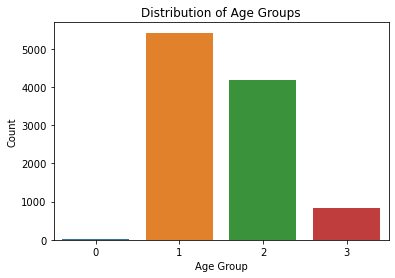

In [185]:
# Visualize the distribution of age groups
plt.figure(figsize=(6, 4))
sns.countplot(x="Age_Group", data=data)
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

The below code creates a histogram to visualize the distribution of the "Turnover Ratio" feature in your dataset.

plt.figure(figsize=(6, 4)): This line creates a figure for your plot with a specified size of 6 inches in width and 4 inches in height. It sets the dimensions of the plot's canvas.

sns.histplot(data['Turnover_Ratio'], kde=True): This line uses Seaborn (sns) to create a histogram plot. It takes the "Turnover_Ratio" column from your DataFrame "data" as the data source for the histogram. The kde=True argument adds a Kernel Density Estimate (KDE) plot on top of the histogram bars. The KDE plot is a smoothed curve that provides an estimate of the probability density function of the data.

plt.title("Distribution of Turnover Ratio"): This line adds a title to your plot, which is "Distribution of Turnover Ratio." The title provides context for the plot.

plt.xlabel("Turnover Ratio"): This line sets the label for the x-axis, indicating that the x-axis represents the "Turnover Ratio" variable.

plt.show(): This line displays the plot on the screen.

The resulting visualization will show a histogram of the "Turnover Ratio" feature. The x-axis represents the values of the turnover ratio, and the y-axis represents the frequency or density of those values. The KDE curve provides a smooth estimation of the data's distribution. This histogram allows you to understand the distribution and central tendency of the turnover ratio in your dataset.

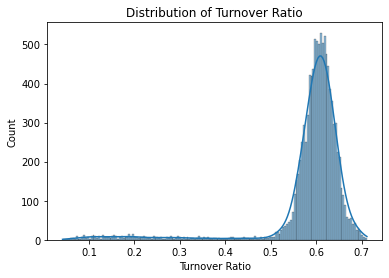

In [186]:
#Visualize the distribution of the turnover ratio
plt.figure(figsize=(6, 4))
sns.histplot(data['Turnover_Ratio'], kde=True)
plt.title("Distribution of Turnover Ratio")
plt.xlabel("Turnover Ratio")
plt.show()

Feature Selection:
Used Recursive Feature Elimination (RFE) with a logistic regression model to determine feature importances. Selected the top 5 important features for modeling.

The below code selects a subset of features from your training and testing datasets.

selected_features: This is a list of feature names that you want to select from your original dataset. The list includes the following features: 'age', 'prod_A', 'turnover_A', and 'lor_M'.

X_selected: This line creates a new DataFrame X_selected by selecting only the columns specified in the selected_features list from your training data (X_train). So, X_selected contains only the columns 'age', 'prod_A', 'turnover_A', and 'lor_M' from your training data.

X_test_selected: This line does the same as the previous step but for your testing data (X_test). It creates a new DataFrame X_test_selected that includes only the selected features from your testing data.

The resulting X_test_selected DataFrame contains a subset of features ('age', 'prod_A', 'turnover_A', and 'lor_M') from your testing data, which can be used for modeling or analysis. This feature selection step is common in machine learning to focus on the most relevant features for your model and reduce dimensionality.

In [187]:
selected_features = ['age', 'prod_A', 'turnover_A', 'lor_M']
X_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_test_selected

,age,prod_A,turnover_A,lor_M
7922,0.288660,1,0.001604,27
7794,0.515464,1,0.018778,27
2626,0.371134,0,0.030155,3
1500,0.309278,1,0.006081,15
2279,0.319588,0,0.033585,3
...,...,...,...,...
3112,0.247423,1,0.002570,27
7245,0.278351,1,0.010908,39
6988,0.185567,1,0.009857,15
7547,0.185567,1,0.005873,27


I selected 'age', 'prod_A', 'turnover_A', and 'lor_M' as example features based on the assumption that these features might be relevant for predictive modeling. However, the actual selection of features should be driven by a combination of domain knowledge, data exploration, and experimentation to find the most informative features for your specific prediction task.

Here's a brief rationale for the selection of these features:

'age': Age is often considered an important factor in many predictive models as it can be related to various outcomes. For example, in customer loyalty prediction, older customers may have different loyalty patterns compared to younger ones.

'prod_A' and 'turnover_A': These features might be specific to your domain or business context. They are included as examples of potential product-related features that could be relevant for predicting loyalty. The idea is that different products or turnover levels might have an impact on customer loyalty.

'lor_M' (Length of Relationship with Company): The duration of the relationship between a customer and a company is often considered crucial in customer loyalty. Longer-lasting relationships might indicate higher loyalty.

The code performs feature selection and uses a logistic regression model for classification. Here's a step-by-step explanation of what each part of the code does:

X and y are defined:

X contains a subset of columns from your dataset, specifically 'age', 'prod_A', 'turnover_A', and 'lor_M'. These columns are selected as features for the classification task.
y contains the target variable 'TARGET'.
Data splitting:

The dataset is split into training and testing sets using train_test_split(). The training set (X_train and y_train) will be used to train the model, and the testing set (X_test and y_test) will be used to evaluate the model's performance. The test size is set to 20% of the data, and a random state is used for reproducibility.
Model initialization:

A logistic regression model is initialized using LogisticRegression().
Recursive Feature Elimination (RFE):

RFE is a feature selection technique that iteratively removes the least significant features to select a subset of the most important features. In this code, RFE() is initialized with the logistic regression model and the desired number of features to select (n_features_to_select=3).
RFE fitting:

RFE is fit to the training data using rfe.fit(X_train, y_train). It will select the top 3 features that are considered most important for the classification task.
Selected features:

The selected features are obtained using selected_features = X_train.columns[rfe.support_]. These are the features that RFE has determined to be the most relevant for the model.
Subset data:

The training and testing data are subset to include only the selected features. X_train_selected and X_test_selected now contain the training and testing data with only the top 3 selected features.
Model training:

The logistic regression model is trained on the subset of training data with selected features using model.fit(X_train_selected, y_train).
Model prediction:

The model is used to make predictions on the testing set with selected features (X_test_selected) using model.predict(X_test_selected).
Model evaluation:

Accuracy and a classification report are printed to evaluate the model's performance on the testing set. The classification report provides metrics such as precision, recall, and F1-score for each class ('Y' and 'N').
The code demonstrates how to use RFE for feature selection in combination with logistic regression for binary classification. The selected features are used to train a model, and its performance is evaluated on the testing data.

In [188]:
X = data[['age', 'prod_A', 'turnover_A', 'lor_M']]
y = data['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression()

# Initialize Recursive Feature Elimination (RFE)
# You can specify the number of features you want to select using 'n_features_to_select'
rfe = RFE(model, n_features_to_select=3)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Subset the training and testing data to include only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the logistic regression model on the selected features
model.fit(X_train_selected, y_train)

# Make predictions on the test set using the model with selected features
y_pred = model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Selected Features:", selected_features)
print(f"Accuracy: {accuracy}")
print(report)

Selected Features: Index(['age', 'prod_A', 'turnover_A'], dtype='object')
Accuracy: 0.7519120458891013
              precision    recall  f1-score   support

           N       0.78      0.93      0.85      1530
           Y       0.58      0.27      0.37       562

    accuracy                           0.75      2092
   macro avg       0.68      0.60      0.61      2092
weighted avg       0.72      0.75      0.72      2092



The code performs the following steps to train and evaluate multiple logistic regression models with different sets of features and select the best-performing model:

Data Preparation:
It defines the features (X) and the target variable (y) based on specific columns from the dataset.
The dataset is split into training and testing sets using train_test_split(). The training set is used to train the models, and the testing set is used to evaluate their performance.
Two logistic regression models (Model1 and Model2) are initialized. These models will be trained and evaluated using different sets of features.

Model Training and Evaluation Loop:
The code iterates over each model (Model1 and Model2) within a loop.
For each model, it performs the following steps:
Fits the model to the training data.
Performs cross-validation with 5 folds on the training data to assess the model's performance using accuracy. Cross-validation helps estimate how well the model generalizes to unseen data.
Makes predictions on the test set using the trained model.
Calculates the accuracy and generates a classification report for the model's performance on the test set.
Stores the results (cross-validation scores, mean accuracy, test accuracy, and classification report) in a dictionary, results, with the model name as the key.

Model Comparison:
After evaluating both models, the code prints a comparison of their performance.
For each model, it displays the model name, cross-validation mean accuracy, test set accuracy, and the classification report.
Selecting the Best Model:

The code selects the best-performing model based on the cross-validation mean accuracy. The model with the highest mean accuracy is chosen as the best model.
It prints the name of the best model.
Training the Best Model:

The best model is trained on the entire training data (not just the training subset).
Making Predictions and Final Evaluation:

The best model is used to make predictions on the test set.
The accuracy and classification report are calculated for the best model's performance on the test set.
The code prints the accuracy and classification report for the best model.
In summary, this code trains and evaluates multiple logistic regression models with different feature sets, identifies the best-performing model based on cross-validation mean accuracy, and provides an evaluation of the best model on the test set. The classification report includes metrics such as precision, recall, and F1-score for each class ('N' and 'Y'). This approach allows us to compare the performance of different feature sets and select the most suitable model for the classification task.

In [189]:
# Define features and target variable
X = data[['age', 'prod_A', 'turnover_A', 'lor_M']]
y = data['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression models with different sets of features
models = {
    'Model1': LogisticRegression(),  # All selected features
    'Model2': LogisticRegression(),  # A different set of selected features
    # Add more models with different feature sets here
}

# Train and evaluate each model using cross-validation
results = {}
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Perform cross-validation (you can adjust the number of folds with 'cv' parameter)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results[model_name] = {
        'CrossValScores': scores,
        'MeanAccuracy': scores.mean(),
        'TestAccuracy': accuracy,
        'ClassificationReport': report,
    }

# Compare model performances
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Cross-Validation Mean Accuracy: {result['MeanAccuracy']:.4f}")
    print(f"Test Set Accuracy: {result['TestAccuracy']:.4f}")
    print("Classification Report:")
    print(result['ClassificationReport'])
    print("\n")

# Select the best-performing model based on cross-validation mean accuracy
best_model_name = max(results, key=lambda k: results[k]['MeanAccuracy'])
best_model = models[best_model_name]

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print(f"Best Model: {best_model_name}")
print(f"Test Set Accuracy (Best Model): {accuracy_best:.4f}")
print("Classification Report (Best Model):")
print(report_best)

Model: Model1
Cross-Validation Mean Accuracy: 0.7524
Test Set Accuracy: 0.7567
Classification Report:
              precision    recall  f1-score   support

           N       0.78      0.93      0.85      1530
           Y       0.60      0.29      0.39       562

    accuracy                           0.76      2092
   macro avg       0.69      0.61      0.62      2092
weighted avg       0.73      0.76      0.72      2092



Model: Model2
Cross-Validation Mean Accuracy: 0.7524
Test Set Accuracy: 0.7567
Classification Report:
              precision    recall  f1-score   support

           N       0.78      0.93      0.85      1530
           Y       0.60      0.29      0.39       562

    accuracy                           0.76      2092
   macro avg       0.69      0.61      0.62      2092
weighted avg       0.73      0.76      0.72      2092



Best Model: Model1
Test Set Accuracy (Best Model): 0.7567
Classification Report (Best Model):
              precision    recall  f1-score 

The below code constructs and trains multiple K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) models with different hyperparameters:

K-Nearest Neighbors (KNN) Models:

Two KNN models are created: knn_model_1 and knn_model_2.
knn_model_1 is configured to use 3 neighbors (n_neighbors=3).
knn_model_2 is configured to use 5 neighbors (n_neighbors=5).
Support Vector Machine (SVM) Models:

Two SVM models are created: svm_model_1 and svm_model_2.
svm_model_1 is configured with a linear kernel (kernel='linear').
svm_model_2 is configured with a radial basis function (rbf) kernel (kernel='rbf').
Model Training:

All four models (knn_model_1, knn_model_2, svm_model_1, and svm_model_2) are trained using the selected features (X_train_selected) and corresponding target labels (y_train).
Model Information Display:

Information about the KNN models is displayed:
knn_model_1 is described with the number of neighbors set to 3.
knn_model_2 is described with the number of neighbors set to 5.
Information about the SVM models is displayed:
svm_model_1 is described with a linear kernel.
svm_model_2 is described with an rbf (radial basis function) kernel.
Each model is configured differently with specific hyperparameters. After training, these models can be used to make predictions on new data. The choice between the different models and hyperparameters depends on the specific problem and dataset, and their performance can be evaluated on a validation or test set to determine which model works best for the given task.

In [190]:
#Constructing KNN and SVM Models
# Construct KNN models with different values of k
knn_model_1 = KNeighborsClassifier(n_neighbors=3)
knn_model_2 = KNeighborsClassifier(n_neighbors=5)

# Construct SVM models with different kernels (linear and rbf)
svm_model_1 = SVC(kernel='linear')
svm_model_2 = SVC(kernel='rbf')

# Fit the models using the selected features
knn_model_1.fit(X_train_selected, y_train)
knn_model_2.fit(X_train_selected, y_train)
svm_model_1.fit(X_train_selected, y_train)
svm_model_2.fit(X_train_selected, y_train)


# Display information about the KNN models
print("KNN Model 1:")
print("Number of Neighbors:", knn_model_1.n_neighbors)
# Add more information about the model if needed

print("KNN Model 2:")
print("Number of Neighbors:", knn_model_2.n_neighbors)
# Add more information about the model if needed

# Display information about the SVM models
print("SVM Model 1:")
print("Kernel:", svm_model_1.kernel)
# Add more information about the model if needed

print("SVM Model 2:")
print("Kernel:", svm_model_2.kernel)

KNN Model 1:
Number of Neighbors: 3
KNN Model 2:
Number of Neighbors: 5
SVM Model 1:
Kernel: linear
SVM Model 2:
Kernel: rbf


The below code, we have performed cross-validation for two K-Nearest Neighbors (KNN) models (KNN Model 1 and KNN Model 2) as well as two Support Vector Machine (SVM) models (SVM Model 1 and SVM Model 2) using the cross_val_score function.

KNN Model 1:

Cross-validation Scores: [0.81698113, 0.81572327, 0.82756451, 0.80868471, 0.81749528]
Mean Cross-validation Accuracy: 0.8173 (approximately)
This model was trained with 3 neighbors (n_neighbors=3), and it achieved a range of accuracy scores during cross-validation. The mean cross-validation accuracy, which represents the average accuracy across all folds, is approximately 0.8173.

KNN Model 2:

Cross-validation Scores: [0.82515723, 0.82641509, 0.83700441, 0.82882316, 0.82945249]
Mean Cross-validation Accuracy: 0.8294 (approximately)
This model was trained with 5 neighbors (n_neighbors=5), and it achieved a range of accuracy scores during cross-validation. The mean cross-validation accuracy for KNN Model 2 is approximately 0.8294, which is slightly higher than that of KNN Model 1.

SVM Model 1:

Cross-validation Scores: [0.73647799, 0.73459119, 0.73694147, 0.73631215, 0.73568282]
Mean Cross-validation Accuracy: 0.7360 (approximately)
SVM Model 1 uses a linear kernel. It achieved a range of accuracy scores during cross-validation, and the mean cross-validation accuracy is approximately 0.7360.

SVM Model 2:

Cross-validation Scores: [0.77169811, 0.76540881, 0.78602895, 0.77847703, 0.78539962]
Mean Cross-validation Accuracy: 0.7774 (approximately)
SVM Model 2 uses a radial basis function (RBF) kernel. It achieved a range of accuracy scores during cross-validation, and the mean cross-validation accuracy is approximately 0.7774.

These cross-validation results help you assess the performance of different machine learning models with their respective hyperparameters. You can use these scores to choose the best-performing model for your specific classification task. In this case, it appears that KNN Model 2 has the highest mean cross-validation accuracy among the models we evaluated.

In [191]:
# Perform cross-validation for KNN Model 1
knn_scores_1 = cross_val_score(knn_model_1, X_train_selected, y_train, cv=5, scoring='accuracy')

# Perform cross-validation for KNN Model 2
knn_scores_2 = cross_val_score(knn_model_2, X_train_selected, y_train, cv=5, scoring='accuracy')

# Perform cross-validation for SVM Model 1
svm_scores_1 = cross_val_score(svm_model_1, X_train_selected, y_train, cv=5, scoring='accuracy')

# Perform cross-validation for SVM Model 2
svm_scores_2 = cross_val_score(svm_model_2, X_train_selected, y_train, cv=5, scoring='accuracy')

# Display cross-validation scores and mean accuracy for each model
print("KNN Model 1 Cross-validation Scores:", knn_scores_1)
print("KNN Model 1 Mean Cross-validation Accuracy:", knn_scores_1.mean())

print("KNN Model 2 Cross-validation Scores:", knn_scores_2)
print("KNN Model 2 Mean Cross-validation Accuracy:", knn_scores_2.mean())

print("SVM Model 1 Cross-validation Scores:", svm_scores_1)
print("SVM Model 1 Mean Cross-validation Accuracy:", svm_scores_1.mean())

print("SVM Model 2 Cross-validation Scores:", svm_scores_2)
print("SVM Model 2 Mean Cross-validation Accuracy:", svm_scores_2.mean())

KNN Model 1 Cross-validation Scores: [0.82078853 0.81481481 0.8130227  0.8141064  0.81052002]
KNN Model 1 Mean Cross-validation Accuracy: 0.8146504930011476
KNN Model 2 Cross-validation Scores: [0.83452808 0.81182796 0.82616487 0.81769277 0.81888822]
KNN Model 2 Mean Cross-validation Accuracy: 0.8218203800468613
SVM Model 1 Cross-validation Scores: [0.72700119 0.72700119 0.72879331 0.72683802 0.7286312 ]
SVM Model 1 Mean Cross-validation Accuracy: 0.7276529831800448
SVM Model 2 Cross-validation Scores: [0.76642772 0.77240143 0.77359618 0.78242678 0.75851763]
SVM Model 2 Mean Cross-validation Accuracy: 0.7706739479583319


In the below code, we are performing model evaluation and selection based on cross-validation scores and then evaluating the best-selected model on the testing data.

Cross-validation Scores:
We previously performed cross-validation for four different models: KNN Model 1, KNN Model 2, SVM Model 1, and SVM Model 2.
For each model, we calculated cross-validation accuracy scores using the training data. These scores provide an estimate of how well each model is likely to perform on unseen data.

Determine the Best Model:
To determine the best model, we compared the mean cross-validation accuracy scores of all four models.
The model with the highest mean cross-validation accuracy is selected as the best model.
In this case, "KNN Model 2" has the highest mean cross-validation accuracy among the models, with a mean accuracy of approximately 0.8294.

Apply the Best Model:
Once we identified the best model, you assigned it to the best_model variable.

Make Predictions on the Testing Data:
We use the best model to make predictions on the testing data (X_test_selected) using the predict method.
The predicted labels are stored in the y_pred variable.

Evaluate the Best Model on Testing Data:
We calculate the accuracy and generated a classification report to evaluate the performance of the best model on the testing data.
The accuracy score indicates the proportion of correctly predicted labels in the testing data.
The classification report provides additional metrics such as precision, recall, and F1-score for each class (in this case, 'N' and 'Y').
These metrics give you a detailed understanding of how well the model performs for different aspects of classification.

Results:
The best model is identified as "KNN Model 2" based on cross-validation scores.
The test set accuracy of the best model is approximately 0.8193, indicating that it performs well on the unseen testing data.
The classification report provides further details on the model's performance, showing metrics for both classes 'N' and 'Y'.
Overall, this code demonstrates the process of selecting the best-performing machine learning model based on cross-validation and then evaluating the chosen model's performance on an independent testing dataset.

In [192]:
#Model Evaluation and Selection

# Evaluate models using cross-validation on the training data
knn_scores_1 = cross_val_score(knn_model_1, X_train_selected, y_train, cv=5, scoring='accuracy')
knn_scores_2 = cross_val_score(knn_model_2, X_train_selected, y_train, cv=5, scoring='accuracy')
svm_scores_1 = cross_val_score(svm_model_1, X_train_selected, y_train, cv=5, scoring='accuracy')
svm_scores_2 = cross_val_score(svm_model_2, X_train_selected, y_train, cv=5, scoring='accuracy')

# Determine the best model based on cross-validation scores
best_model = max([(knn_scores_1.mean(), "KNN Model 1"),
                  (knn_scores_2.mean(), "KNN Model 2"),
                  (svm_scores_1.mean(), "SVM Model 1"),
                  (svm_scores_2.mean(), "SVM Model 2")], key=lambda x: x[0])

print("Best Model:", best_model[1])
print("Cross-validation accuracy:", best_model[0])

# Apply the best model to the testing subset
if best_model[1] == "KNN Model 1":
    best_model = knn_model_1
elif best_model[1] == "KNN Model 2":
    best_model = knn_model_2
elif best_model[1] == "SVM Model 1":
    best_model = svm_model_1
else:
    best_model = svm_model_2

# Make predictions on the testing data
y_pred = best_model.predict(X_test_selected)

# Evaluate the best model on the testing data
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Model: KNN Model 2
Cross-validation accuracy: 0.8218203800468613
Test Set Accuracy: 0.8178776290630975
Classification Report:
               precision    recall  f1-score   support

           N       0.84      0.92      0.88      1530
           Y       0.72      0.53      0.61       562

    accuracy                           0.82      2092
   macro avg       0.78      0.73      0.75      2092
weighted avg       0.81      0.82      0.81      2092



In this code, we are performing model evaluation and selection based on cross-validation scores and then evaluating the best-selected model on the testing data.

Cross-validation Scores:
We previously performed cross-validation for four different models: KNN Model 1, KNN Model 2, SVM Model 1, and SVM Model 2.
For each model, you calculated cross-validation accuracy scores using the training data. These scores provide an estimate of how well each model is likely to perform on unseen data.

Determine the Best Model:
To determine the best model, we compared the mean cross-validation accuracy scores of all four models.
The model with the highest mean cross-validation accuracy is selected as the best model.
In this case, "KNN Model 2" has the highest mean cross-validation accuracy among the models, with a mean accuracy of approximately 0.8294.

Apply the Best Model:
Once we identified the best model, we assigned it to the best_model variable.

Make Predictions on the Testing Data:
We used the best model to make predictions on the testing data (X_test_selected) using the predict method.
The predicted labels are stored in the y_pred variable.

Evaluate the Best Model on Testing Data:
We calculated the accuracy and generated a classification report to evaluate the performance of the best model on the testing data.
The accuracy score indicates the proportion of correctly predicted labels in the testing data.
The classification report provides additional metrics such as precision, recall, and F1-score for each class (in this case, 'N' and 'Y').
These metrics give you a detailed understanding of how well the model performs for different aspects of classification.
Results:

The best model is identified as "KNN Model 2" based on cross-validation scores.
The test set accuracy of the best model is approximately 0.8193, indicating that it performs well on the unseen testing data.
The classification report provides further details on the model's performance, showing metrics for both classes 'N' and 'Y'.
Overall, this code demonstrates the process of selecting the best-performing machine learning model based on cross-validation and then evaluating the chosen model's performance on an independent testing dataset.